In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.style.use('classic')

In [2]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Activation, Dropout, Flatten, Dense

In [3]:
import os
import cv2
from PIL import Image
import numpy as np

In [4]:
image_directory = 'train/'
SIZE = 150
dataset = []    
label = []  #Place holders to define add labels. We will add 0 to all  images and 1 to uninfected.


In [5]:
open_images = os.listdir(image_directory + 'Open/')
for i, image_name in enumerate(open_images):    
    if (image_name.split('.')[1] == 'jpg'):
        image = cv2.imread(image_directory + 'Open/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(0)

In [6]:
closed_images = os.listdir(image_directory + 'Closed/')
for i, image_name in enumerate(closed_images):
    if (image_name.split('.')[1] == 'jpg'):
        image = cv2.imread(image_directory + 'Closed/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(1)

In [7]:
dataset = np.array(dataset)
label = np.array(label)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(dataset, label, test_size = 0.20, random_state = 42)

In [10]:
import tensorflow as tf
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

In [11]:
INPUT_SHAPE = (SIZE, SIZE, 3)

In [12]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=INPUT_SHAPE))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

In [13]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',             #also try adam
              metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        1

In [15]:
history = model.fit(X_train, 
                         y_train, 
                         batch_size = 64, 
                         verbose = 1, 
                         epochs = 25,      
                         validation_data=(X_test,y_test),
                         shuffle = False
                     )

Epoch 1/25
19/19 [==============================] - 79s 1s/step - loss: 0.7939 - accuracy: 0.5332 - val_loss: 0.4131 - val_accuracy: 0.8247
Epoch 2/25
19/19 [==============================] - 22s 1s/step - loss: 0.4115 - accuracy: 0.8385 - val_loss: 0.2665 - val_accuracy: 0.9072
Epoch 3/25
19/19 [==============================] - 22s 1s/step - loss: 0.2378 - accuracy: 0.9124 - val_loss: 0.2076 - val_accuracy: 0.9347
Epoch 4/25
19/19 [==============================] - 22s 1s/step - loss: 0.1800 - accuracy: 0.9257 - val_loss: 0.1547 - val_accuracy: 0.9519
Epoch 5/25
19/19 [==============================] - 23s 1s/step - loss: 0.1617 - accuracy: 0.9412 - val_loss: 0.1267 - val_accuracy: 0.9622
Epoch 6/25
19/19 [==============================] - 23s 1s/step - loss: 0.1374 - accuracy: 0.9568 - val_loss: 0.1408 - val_accuracy: 0.9381
Epoch 7/25
19/19 [==============================] - 23s 1s/step - loss: 0.1002 - accuracy: 0.9648 - val_loss: 0.1117 - val_accuracy: 0.9691
Epoch 8/25
19/19 [==

In [16]:
model.save('openorclose2.h5')

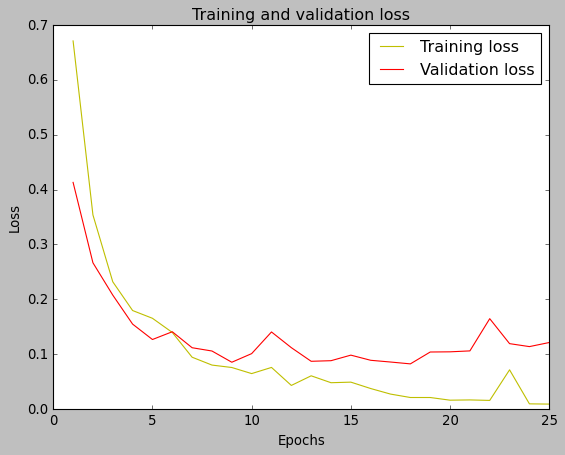

In [17]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

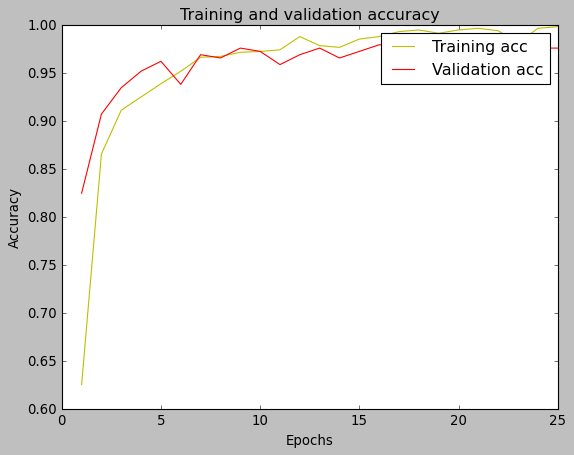

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


The prediction for this image is:  [[1.]]
The actual label for this image is:  1


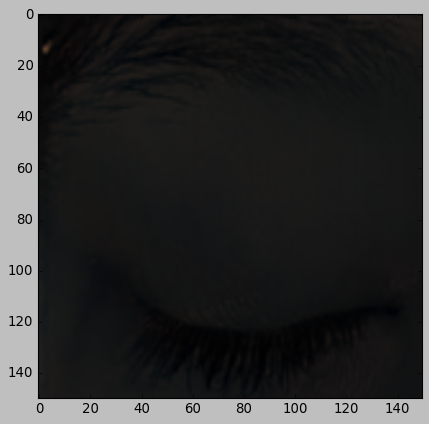

In [20]:
n=24  #Select the index of image to be loaded for testing
img = X_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
print("The prediction for this image is: ", model.predict(input_img))
print("The actual label for this image is: ", y_test[n])

In [31]:
from keras.models import load_model
# load model
model = load_model('openorclose2.h5')

_, acc = model.evaluate(X_test, y_test)
print("Accuracy = ", (acc * 100.0), "%")

10/10 [==============================] - 4s 153ms/step - loss: 0.1212 - accuracy: 0.9759
Accuracy =  97.5944995880127 %


In [38]:
from sklearn.metrics import classification_report


In [40]:
mythreshold=0.5
from sklearn.metrics import confusion_matrix
y_pred = (model.predict(X_test)>= mythreshold).astype(int)
cm=confusion_matrix(y_test, y_pred)  
print(cm)
print(classification_report(y_test,y_pred))

[[143   5]
 [  2 141]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       148
           1       0.97      0.99      0.98       143

    accuracy                           0.98       291
   macro avg       0.98      0.98      0.98       291
weighted avg       0.98      0.98      0.98       291



In [34]:
mythreshold=0.738997
from sklearn.metrics import confusion_matrix
y_pred = (model.predict(X_test)>= mythreshold).astype(int)
cm=confusion_matrix(y_test, y_pred)  
print(cm)

[[145   3]
 [  2 141]]


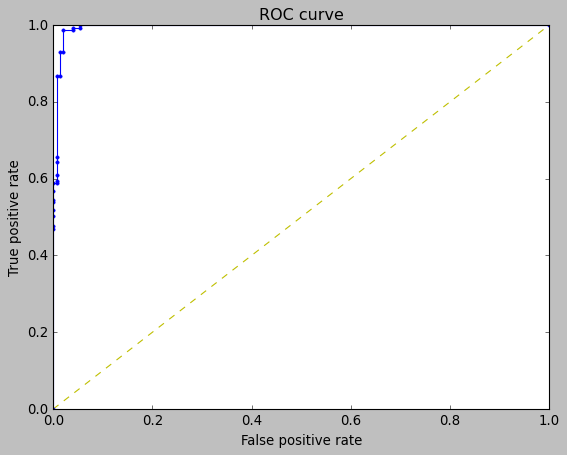

In [35]:
from sklearn.metrics import roc_curve
y_preds = model.predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_preds)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'y--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()

In [36]:
import pandas as pd
i = np.arange(len(tpr)) 
roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'thresholds' : pd.Series(thresholds, index=i)})
ideal_roc_thresh = roc.iloc[(roc.tf-0).abs().argsort()[:1]]  #Locate the point where the value is close to 0
print("Ideal threshold is: ", ideal_roc_thresh['thresholds']) 
ideal_roc_thresh

Ideal threshold is:  18    0.738997
Name: thresholds, dtype: float32


,tf,thresholds
18,0.006284,0.738997


In [37]:
from sklearn.metrics import auc
auc_value = auc(fpr, tpr)
print("Area under curve, AUC = ", auc_value)


Area under curve, AUC =  0.9954639954639954
